# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.66319988129                   -1.43    5.21s
  2   +19.10138972977        0.93       -0.88   10.5ms
  3   +12.46369442746        0.82       -0.45   10.4ms
  4   +11.36235243192        0.04       -0.37   8.31ms
  5   +10.29809926944        0.03       -0.60   8.32ms
  6   +9.603062969362       -0.16       -0.74   8.28ms
  7   +9.086622370685       -0.29       -0.83   8.36ms
  8   +8.587855574592       -0.30       -0.88   8.31ms
  9   +8.310297241023       -0.56       -0.95   8.35ms
 10   +8.214907481059       -1.02       -1.02   8.29ms
 11   +8.165458320848       -1.31       -1.09   6.28ms
 12   +8.091663750778       -1.13       -0.91   6.36ms
 13   +8.086403973747       -2.28       -0.82   6.31ms
 14   +8.041996121383       -1.35       -1.04   6.32ms
 15   +7.962156130164       -1.10       -0.89   8.33ms
 16   +7.889904691256       -1.14       -0.92   8.35ms
 17   +7.87

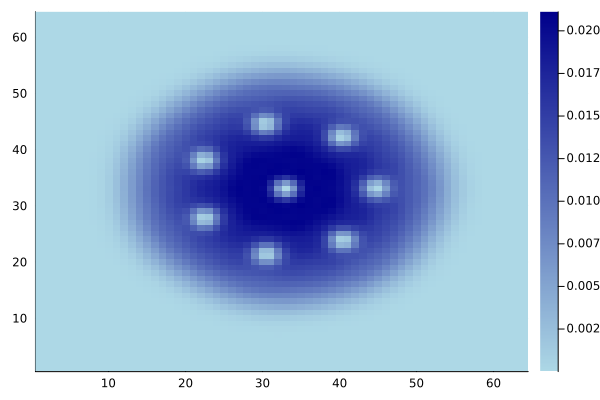

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)